# import Libraries

In [12]:
import pandas as pd
import numpy as np

# import dataset

In [16]:
data_df = pd.read_excel(r'C:\Users\dell\Desktop\Data Science Diploma\CCPP\CCPP\Folds5x2_pp.xlsx')

In [19]:
data_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [29]:
data_df.tail()

,AT,V,AP,RH,PE
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [30]:
data_df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


# define X and Y


In [32]:
x = data_df.drop(['PE'],axis=1).values
y= data_df['PE'].values

In [34]:
print(x)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [35]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


# Split the dataset in training set and test set

In [39]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y ,test_size=0.3 ,random_state=0)

# train the model on the training set

In [41]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

# predict the test set results

In [52]:
y_pred = ml.predict(x_test)
y_pred[0:5]

array([431.40245096, 458.61474119, 462.81967423, 448.60123698,
       457.87947949])

In [47]:
data_df['PE'].head()

0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: PE, dtype: float64

In [53]:
ml.predict([[14.96,41.76,1024.07,73.17]])

array([467.34820092])

# Evaluate the model

In [54]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9304112159477683

# plot the results

Text(0.5, 1.0, 'Actual vs. Predicted')

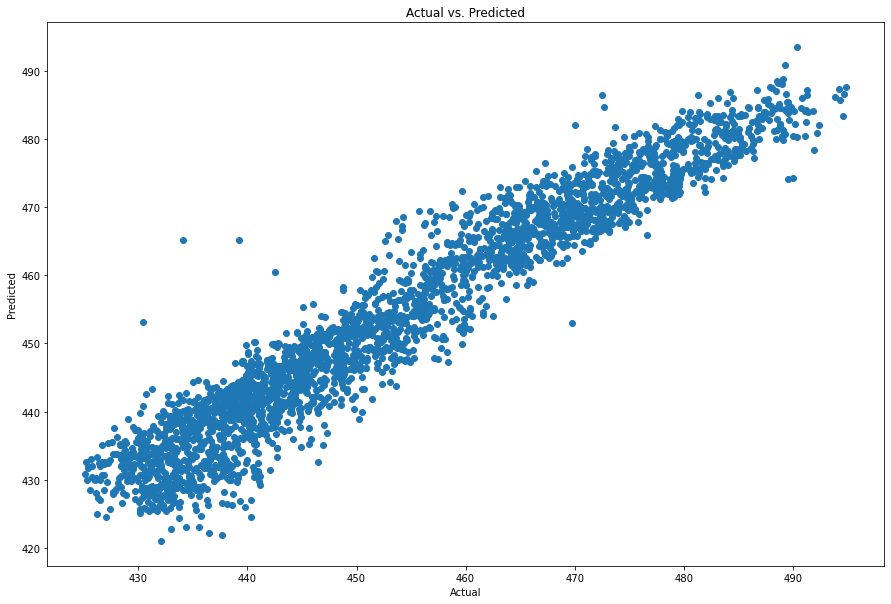

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

# predicted values

In [57]:
pred_y_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
0,431.23,431.402451,-0.172451
1,460.01,458.614741,1.395259
2,461.14,462.819674,-1.679674
3,445.90,448.601237,-2.701237
4,451.29,457.879479,-6.589479
5,432.68,429.676856,3.003144
6,477.50,473.017115,4.482885
7,459.68,456.532373,3.147627
8,477.50,474.342524,3.157476
9,444.99,446.364396,-1.374396
